# Evrişimli Sinir Ağı (CNN)

CNN veya evrişimli sinir ağı, bilgisayarların görüntüleri anlamasına ve sınıflandırmasına yardımcı olan bir yapay zeka modelidir. Biraz önce kullandığımız örnekte, belirli bir el yazısı rakamının (örneğin, 0'dan 9'a kadar olan bir rakamın) ne olduğunu tahmin etmek için kullanılmıştır.

Neden "evrişimli" denir? İşte bir örnek: Diyelim ki bir resimde bir kedi var. Bu resim, birçok piksel (renk noktası) içerir. Evrişimli sinir ağı, bu resimdeki desenleri ve özellikleri algılamak için bir tür "filtre" kullanır. Bu filtre, küçük parçalara bölünmüş ve farklı desenleri ve özellikleri belirlemek için kullanılır. Örneğin, bir kedi resmindeki kulakların ve burunun belirli desenlerini algılamak için bir filtre kullanılabilir.

CNN, birçok katmandan oluşur. Her katman, resmi farklı şekillerde işler ve bu işlemler resmin daha karmaşık özelliklerini anlamak için bir araya gelir. Sonuç olarak, CNN, görüntülerdeki desenleri ve özellikleri algılamak ve anlamak için oldukça etkili bir yapıya sahiptir.

Özetle, evrişimli sinir ağı, görüntülerdeki desenleri ve özellikleri algılamak ve sınıflandırmak için kullanılan bir yapay zeka modelidir. Bu, el yazısı rakamları gibi basit görevlerden, nesne tanıma gibi daha karmaşık görevlere kadar birçok uygulama alanına sahiptir.

- CNN, görüntüleri sınıflandırmak için çok uygun bir yapıya sahiptir.
- **CNN Adımları:**
    1. Kütüphaneleri İçeri Aktarma
    2. Veri Kümesini Hazırlama
        - Önceki bölümlerle tamamen aynı.
        - Aynı veri kümesini kullandığımız için sadece train_loader ve test_loader'a ihtiyacımız var.
    3. Evrişim Katmanı:
        - Filtreler (çekirdekler) kullanarak özellik haritaları oluşturur.
        - Dolgulama (Padding): Filtre uygulandıktan sonra orijinal görüntünün boyutları azalır. Ancak, orijinal görüntü hakkında mümkün olduğunca çok bilgiyi korumak istiyoruz. Dolgulama uygulayarak evrişim katmanından sonra özellik haritasının boyutunu artırabiliriz.
        - 2 evrişim katmanı kullanacağız.
        - Özellik haritasının sayısı out_channels = 16 olacak.
        - Filtre(çekirdek) boyutu 5*5 olacak.
    4. Havuzlama Katmanı:
        - Evrişim katmanı çıkışından (özellik haritası) yoğunlaştırılmış bir özellik haritası hazırlar.
        - Max pooling kullanacağımız 2 havuzlama katmanı.
        - Havuzlama boyutu 2*2 olacak.
    5. Düzleştirme: Özellik haritasını düzleştirir.
    6. Tam Bağlantı Katmanı:
        - Önceki bölümde öğrendiğimiz Yapay Sinir Ağı.
        - Ya da sadece lineer olabilir, ancak sonunda her zaman softmax fonksiyonu bulunur.
        - Tam bağlantı katmanında aktivasyon fonksiyonu kullanmayacağız.
        - Tam bağlantı katmanımızı lojistik regresyon gibi düşünebilirsiniz.
        - Evrişimli kısmı ve lojistik regresyonu birleştirerek CNN modelimizi oluşturuyoruz.
    7. Model Sınıfını Oluşturma
        - Modeli oluşturun
    8. Kayıp Fonksiyonunu Oluşturma
        - Cross entropy kaybı
        - İçinde softmax (lojistik fonksiyon) da bulunur.
    9. Optimizer'ı Oluşturma
        - SGD Optimizer
    10. Modelin Eğitilmesi
    11. Tahmin
- Sonuç olarak, grafikten de görebileceğiniz gibi, kayıp azalırken doğruluk artıyor ve modelimiz öğreniyor. 
- Evrişimli katman sayesinde, model daha iyi öğrenmiş ve doğruluk (%98'e yakın) ANN'nin doğruluğundan daha iyidir. Aslında hiperparametrelerin ayarlanması sırasında, iterasyon sayısının artırılması ve evrişimli sinir ağının genişletilmesi doğruluğu artırabilir, ancak bu, Kaggle'da istemediğimiz çok fazla çalışma zamanı alır.

### Kütüphanelerin import edilmesi

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Verisetinin yüklenmesi ve hazirlanmasi
Bu kısım Logistic regresyon kısmından alınmıştır açıklamalar için oraya bakabilirsiniz.

In [2]:
train = pd.read_csv(r"data/train.csv",dtype = np.float32)

targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization
 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

In [3]:
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

In [4]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [5]:
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)


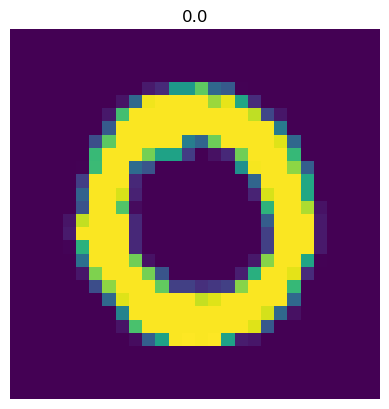

In [6]:
plt.imshow(features_numpy[1].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[1]))
plt.savefig('graph.png')
plt.show()

### CNN ağının oluşturulması

1. **`class CNNModel(nn.Module):`**: Bu satır, bir sınıf tanımlar. Sınıf adı `CNNModel` olarak belirlenmiştir. Bu sınıf, PyTorch'ta `nn.Module` sınıfından türetilmiştir, bu da bu sınıfın bir sinir ağı modelini temsil ettiğini gösterir.

2. **`def __init__(self):`**: Bu, sınıfın kurucu metodudur. İlk olarak, bu metod, `super()` fonksiyonuyla üst sınıfın (nn.Module) kurucu metodunu çağırır ve gerekli başlatma işlemlerini gerçekleştirir.

3. **Evrişim Katmanları**: İki evrişim katmanı tanımlanmıştır. Her biri bir evrişim işlemi ve ardından ReLU aktivasyon fonksiyonu ile birleştirilmiştir. Bu katmanlar, görüntüden özelliklerin çıkarılmasını sağlar.

4. **Havuzlama Katmanları**: İki maksimum havuzlama katmanı tanımlanmıştır. Havuzlama işlemi, evrişim işleminin çıkardığı özellik haritalarını küçültür ve önemli özelliklerin korunmasını sağlar.

5. **Tam Bağlantılı Katman**: Bir tam bağlantılı katman, havuzlama katmanlarından gelen çıktıları alır, düzleştirir ve sonuçları sınıflandırma için kullanılacak bir çıktı katmanına besler.

6. **`def forward(self, x):`**: Bu, ileri geçiş metodudur. Bu metod, modelin bir giriş tensörünü alır ve onu ileriye doğru geçirir, sonuç olarak bir çıktı tensörü üretir.

7. **İleri Geçiş (Forward Pass)**: İleri geçiş sırasında, giriş görüntüsü sırayla evrişim, ReLU aktivasyon, maksimum havuzlama ve düzleştirme işlemlerinden geçer. Son olarak, tam bağlantılı katmana beslenir ve son çıktı üretilir.

Bu kod, bir CNN modelinin bileşenlerini ve girişten çıkışa ilerleyişini gösterir. Bu adımlar, modelin görüntü sınıflandırma görevini başarıyla yerine getirmesine yardımcı olur.



1. **`nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)`**:
   - `in_channels`: Evrişim katmanına giren kanal sayısıdır. Bu, genellikle giriş görüntüsünün kanal sayısına eşittir. Örneğin, renkli görüntülerde (RGB), kanal sayısı 3'tür.
   - `out_channels`: Evrişim katmanından çıkan kanal sayısıdır. Bu, katmanın öğrenmeye çalışacağı özelliklerin sayısını belirler.
   - `kernel_size`: Evrişim çekirdeğinin boyutudur. Çekirdek, görüntü üzerinde hareket ederken alınacak alt bölge boyutunu belirler.
   - `stride`: Çekirdeğin her adımda kaç piksel kaydırılacağını belirler. Büyük adımlar, çıktı boyutunu küçültürken daha küçük adımlar daha fazla özellik haritası oluşturur.
   - `padding`: Giriş görüntüsünün kenarlarına uygulanacak dolgu miktarını belirler. Dolgu, evrişim sonrası çıktı boyutunun giriş boyutuna eşit olmasını sağlar.

2. **`nn.ReLU()`**:
   - ReLU (Rectified Linear Unit), doğrusal olmayan bir aktivasyon fonksiyonudur. Negatif giriş değerlerini sıfıra eşitler ve pozitif giriş değerlerini doğrudan ileterek, modelin doğrusal olmayan özellikleri öğrenmesine yardımcı olur.

3. **`nn.MaxPool2d(kernel_size)`**:
   - Maksimum havuzlama, görüntü boyutunu küçültmek ve önemli özellikleri vurgulamak için kullanılan bir işlemdir. Maksimum havuzlama katmanı, verilen çekirdek boyutu içindeki en büyük piksel değerini alarak özellik haritasını küçültür.

4. **`nn.Linear(in_features, out_features)`**:
   - Tam bağlantılı (fully connected) katman, önceki katmanların çıktılarını alır ve belirtilen çıktı sayısına sahip bir vektör üretir.
   - `in_features`: Giriş boyutu, önceki katmanın çıktı boyutuna bağlıdır. Burada, 32 * 4 * 4, önceki havuzlama katmanından gelen çıktının boyutunu temsil eder.
   - `out_features`: Çıktı boyutu, modelin sınıflandırma yapması gereken sınıf sayısına eşittir. Bu örnekte, 10 rakam sınıfı olduğundan, çıktı boyutu 10'dur.

In [7]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

In [8]:
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

In [9]:
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

In [10]:
model = CNNModel()

In [11]:
error = nn.CrossEntropyLoss()

In [12]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [13]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

In [14]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print(f'Iteration: {count}  Loss: {loss.data}  Accuracy: {accuracy} %')

Iteration: 500  Loss: 0.09159642457962036  Accuracy: 96.78571319580078 %
Iteration: 1000  Loss: 0.04848582297563553  Accuracy: 97.69047546386719 %
Iteration: 1500  Loss: 0.0461917482316494  Accuracy: 97.95237731933594 %
Iteration: 2000  Loss: 0.022158144041895866  Accuracy: 98.26190185546875 %


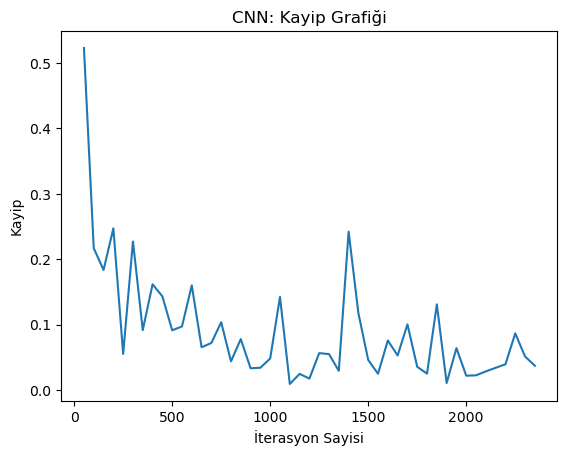

In [15]:
plt.plot(iteration_list,loss_list)
plt.xlabel("İterasyon Sayisi")
plt.ylabel("Kayip")
plt.title("CNN: Kayip Grafiği")
plt.show()

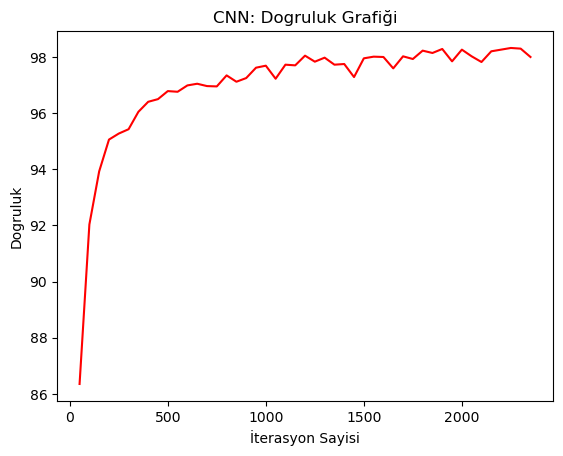

In [16]:
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("İterasyon Sayisi")
plt.ylabel("Dogruluk")
plt.title("CNN: Dogruluk Grafiği")
plt.show()

### Dışardaki bir görüntüden Sınıf tahmini

In [18]:

from PIL import Image
import torchvision.transforms as transforms
import torch.nn.functional as F

image_path = "img/2.jpg"
image = Image.open(image_path)

preprocess = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),  # Resmi siyah beyaza dönüştürme
    transforms.ToTensor(),   # Görüntüyü tensöre dönüştürme ve normalizasyon
])
image = preprocess(image)

# Görüntüyü modele vermeden önce uygun şekle dönüştürme
image = image.view(-1, 1, 28, 28)  # batch_size=1, kanal=1, height=28, width=28

# Görüntüyü modele verme
output = model(image)

# Tahminleri almak için softmax kullanma
probabilities = F.softmax(output, dim=1)

# En yüksek olasılığa sahip sınıfı belirleme
predicted_class = torch.argmax(probabilities)

print("Tahmin edilen sınıf:", predicted_class.item())


Tahmin edilen sınıf: 7


In [19]:
probabilities

tensor([[0.1001, 0.1030, 0.0972, 0.0992, 0.0947, 0.0993, 0.0990, 0.1066, 0.1002,
         0.1007]], grad_fn=<SoftmaxBackward0>)

### Kameradan okuma

In [ ]:
import cv2
cap = cv2.VideoCapture(0)

In [ ]:
preprocess = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
])

In [ ]:
while True:
    ret, frame = cap.read()

    input_image = preprocess(frame).view(-1, 1, 28, 28) 
    
    with torch.no_grad():
        output = model(input_image)
        probabilities = torch.softmax(output, dim=1)
        predicted_class = torch.argmax(probabilities)

    cv2.putText(frame, str(predicted_class.item()), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Real-time Prediction', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()